Implement machine learning using NumPy

In [12]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [19]:
np.random.seed(42)
x = np.linspace(-1, 1, 100).reshape(100, 1)
y = 3 * np.power(x, 2) + 2 + 0.2 * np.random.randn(x.size).reshape(100, 1)

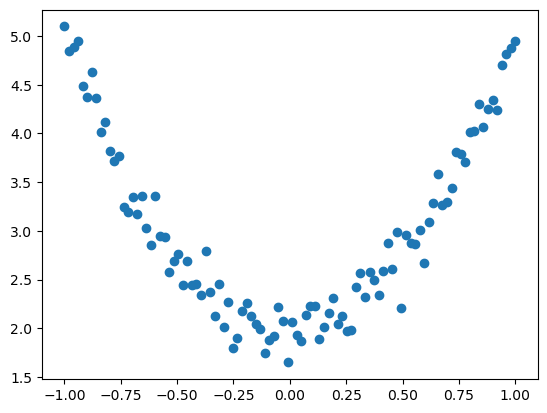

In [15]:
plt.scatter(x, y)
plt.show()

In [ ]:
lr = 0.01
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1)

for i in range(800):
    y_pred = np.power(x,2) * w1 + b1
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    grad_w = np.sum((y_pred - y) * np.power(x, 2))
    grad_b = np.sum((y_pred - y))
    
    # print("loss: ", loss)
    # print("grad_w: ", grad_w)
    # print("grad_b: ", grad_b)
    # print("w1: ", w1)
    # print("b1: ", b1)
    
    w1 = w1 - lr * grad_w
    b1 = b1 - lr * grad_b

loss:  384.46646460029797
grad_w:  -116.1105534839741
grad_b:  -262.10552486842136
w1:  [[0.11986537]]
b1:  [[0.33761517]]
loss:  23.67676617411002
grad_w:  -2.8103925535801713
grad_b:  39.485407077041714
w1:  [[1.2809709]]
b1:  [[2.95867042]]
loss:  15.433144801309531
grad_w:  -15.653149770001146
grad_b:  0.9557227202410687
w1:  [[1.30907483]]
b1:  [[2.56381635]]
loss:  13.182479411659221
grad_w:  -12.720196618874924
grad_b:  5.323125005959983
w1:  [[1.46560633]]
b1:  [[2.55425912]]
loss:  11.360887918907764
grad_w:  -11.882903595895584
grad_b:  4.325723429314362
w1:  [[1.59280829]]
b1:  [[2.50102787]]
loss:  9.827439201124514
grad_w:  -10.880696582681942
grad_b:  4.04098741813284
w1:  [[1.71163733]]
b1:  [[2.45777064]]
loss:  8.535577198355833
grad_w:  -9.990254182139658
grad_b:  3.7001695449524243
w1:  [[1.82044429]]
b1:  [[2.41736076]]
loss:  7.447225681506834
grad_w:  -9.169242693338322
grad_b:  3.3973591663168596
w1:  [[1.92034684]]
b1:  [[2.38035907]]
loss:  6.530324851511134
gr

In [23]:
print(w1, b1)

[[3.03665116]] [[1.96676683]]
